In [24]:
import ipaddress

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv("../Datasets/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df.columns = df.columns.str.strip()
print(df.head())
print(df.columns)




                                   Flow ID       Source IP  Source Port  \
0  192.168.10.5-104.16.207.165-54865-443-6  104.16.207.165          443   
1    192.168.10.5-104.16.28.216-55054-80-6   104.16.28.216           80   
2    192.168.10.5-104.16.28.216-55055-80-6   104.16.28.216           80   
3  192.168.10.16-104.17.241.25-46236-443-6   104.17.241.25          443   
4  192.168.10.5-104.19.196.102-54863-443-6  104.19.196.102          443   

  Destination IP  Destination Port  Protocol      Timestamp  Flow Duration  \
0   192.168.10.5             54865         6  7/7/2017 3:30              3   
1   192.168.10.5             55054         6  7/7/2017 3:30            109   
2   192.168.10.5             55055         6  7/7/2017 3:30             52   
3  192.168.10.16             46236         6  7/7/2017 3:30             34   
4   192.168.10.5             54863         6  7/7/2017 3:30              3   

   Total Fwd Packets  Total Backward Packets  ...  min_seg_size_forward  \
0    

In [28]:
df['Flow ID'].value_counts()


Flow ID
8.0.6.4-8.6.0.1-0-0-0                      44
192.168.10.25-17.253.14.125-123-123-17     44
192.168.10.255-192.168.10.3-137-137-17     24
192.168.10.19-192.168.10.50-137-137-17     19
192.168.10.16-192.168.10.50-48318-139-6    19
                                           ..
192.168.10.3-192.168.10.5-53-55565-17       1
192.168.10.3-192.168.10.5-53-57717-17       1
192.168.10.3-192.168.10.5-53-56816-17       1
192.168.10.3-192.168.10.5-53-64256-17       1
192.168.10.3-192.168.10.12-53-46845-17      1
Name: count, Length: 86421, dtype: int64

In [29]:
df.drop(['Flow ID'], axis=1, inplace=True)

In [30]:
label_encoder = LabelEncoder()
print(df['Label'])
df["Label"] = label_encoder.fit_transform(df["Label"])
print(df["Label"].value_counts())


0         0
1         0
2         0
3         0
4         0
         ..
225740    0
225741    0
225742    0
225743    0
225744    0
Name: Label, Length: 225745, dtype: int64
Label
1    128027
0     97718
Name: count, dtype: int64


In [32]:
import ipaddress
df['Source IP'] = df['Source IP'].apply(lambda ip: int(ipaddress.IPv4Address(ip)))
df['Destination IP'] = df['Destination IP'].apply(lambda ip: int(ipaddress.IPv4Address(ip)))


In [35]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour        # Hour of the day (0-23)
df['Minute'] = df['Timestamp'].dt.minute    # Minute of the hour (0-59)
df['Second'] = df['Timestamp'].dt.second    # Second of the minute (0-59)
df['Day_of_Week'] = df['Timestamp'].dt.dayofweek  # Monday = 0, Sunday = 6
df['Day_of_Month'] = df['Timestamp'].dt.day       # Day of the month (1-31)
df['Month'] = df['Timestamp'].dt.month            # Month (1-12)
df['Weekday_Flag'] = df['Day_of_Week'].apply(lambda x: 1 if x < 5 else 0)  # 1=Weekday, 0=Weekend
df.drop(['Timestamp'], axis=1, inplace=True)
df.head()


,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,...,Idle Max,Idle Min,Label,Hour,Minute,Second,Day_of_Week,Day_of_Month,Month,Weekday_Flag
0,1745932197,443,3232238085,54865,6,3,2,0,12,0,...,0,0,0,3,30,0,4,7,7,1
1,1745886424,80,3232238085,55054,6,109,1,1,6,6,...,0,0,0,3,30,0,4,7,7,1
2,1745886424,80,3232238085,55055,6,52,1,1,6,6,...,0,0,0,3,30,0,4,7,7,1
3,1746006297,443,3232238096,46236,6,34,1,1,6,6,...,0,0,0,3,30,0,4,7,7,1
4,1746125926,443,3232238085,54863,6,3,2,0,12,0,...,0,0,0,3,30,0,4,7,7,1


In [43]:
df.head()

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,...,Idle Min,Label,Hour,Minute,Second,Day_of_Week,Day_of_Month,Month,Weekday_Flag,ID
0,1745932197,443,3232238085,54865,6,3,2,0,12,0,...,0,0,3,30,0,4,7,7,1,1
1,1745886424,80,3232238085,55054,6,109,1,1,6,6,...,0,0,3,30,0,4,7,7,1,2
2,1745886424,80,3232238085,55055,6,52,1,1,6,6,...,0,0,3,30,0,4,7,7,1,3
3,1746006297,443,3232238096,46236,6,34,1,1,6,6,...,0,0,3,30,0,4,7,7,1,4
4,1746125926,443,3232238085,54863,6,3,2,0,12,0,...,0,0,3,30,0,4,7,7,1,5


In [37]:
df['ID']=range(1,len(df.index)+1)

In [70]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
print(df.isna().sum())

Source IP           0
Source Port         0
Destination IP      0
Destination Port    0
Protocol            0
                   ..
Day_of_Week         0
Day_of_Month        0
Month               0
Weekday_Flag        0
ID                  0
Length: 91, dtype: int64


In [72]:
X = df.drop('Label', axis=1)
Y = df['Label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)


In [52]:
model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))



0.999985234185813


In [73]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9988185604158667


In [44]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29262
           1       1.00      1.00      1.00     38462

    accuracy                           1.00     67724
   macro avg       1.00      1.00      1.00     67724
weighted avg       1.00      1.00      1.00     67724



Matplotlib is building the font cache; this may take a moment.


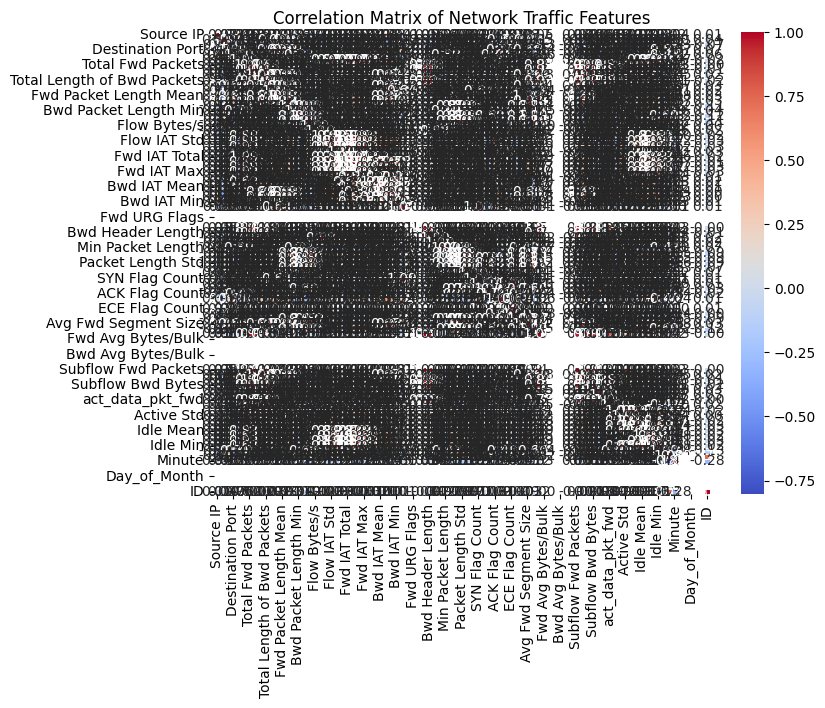

In [47]:
corr_matrix = df.corr()
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Network Traffic Features")
plt.show()


In [51]:
print(df['Label'].value_counts())  # Count normal vs. attack instances

Label
1    128027
0     97718
Name: count, dtype: int64
